In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [29]:
FIGSIZE = (20, 8)
FONTSIZE_BIG = 20
FONTSIZE_SMALL = 15

In [4]:
df = pd.read_csv('summary_prices.csv')
df.head()

,Zone,variable,value,case,scenario,carbon,design,subcomponent,year
0,1,price,0.000883,S1Depolyment_C150_Gatech,S1Depolyment,C150,Gatech,YES,2050
1,2,price,0.000771,S1Depolyment_C150_Gatech,S1Depolyment,C150,Gatech,YES,2050
2,3,price,0.000748,S1Depolyment_C150_Gatech,S1Depolyment,C150,Gatech,YES,2050
3,4,price,0.000736,S1Depolyment_C150_Gatech,S1Depolyment,C150,Gatech,YES,2050
4,5,price,0.000732,S1Depolyment_C150_Gatech,S1Depolyment,C150,Gatech,YES,2050


In [40]:
scenarios = df.scenario.unique()
scenarios

array(['S1Depolyment', 'S2Flexibility', 'S3Reference',
       'S4UnfavorableNoNET', 'S5Unfavorable'], dtype=object)

In [19]:
c_prices = df.carbon.unique()

dfs = {}
for s in scenarios:
    for c in c_prices:
        dfs[s, c] = df.loc[(df['scenario'] == s) & (df['carbon'] == c) & (df['design'] == 'Gatech')]

In [31]:
dfs['S1Depolyment', 'C150']['value'].values
# dfs['S1Depolyment', 'C225']['value'].plot()

array([8.83367766e-04, 7.70515632e-04, 7.47777868e-04, ...,
       7.29221592e+01, 7.29221577e+01, 7.29221622e+01])

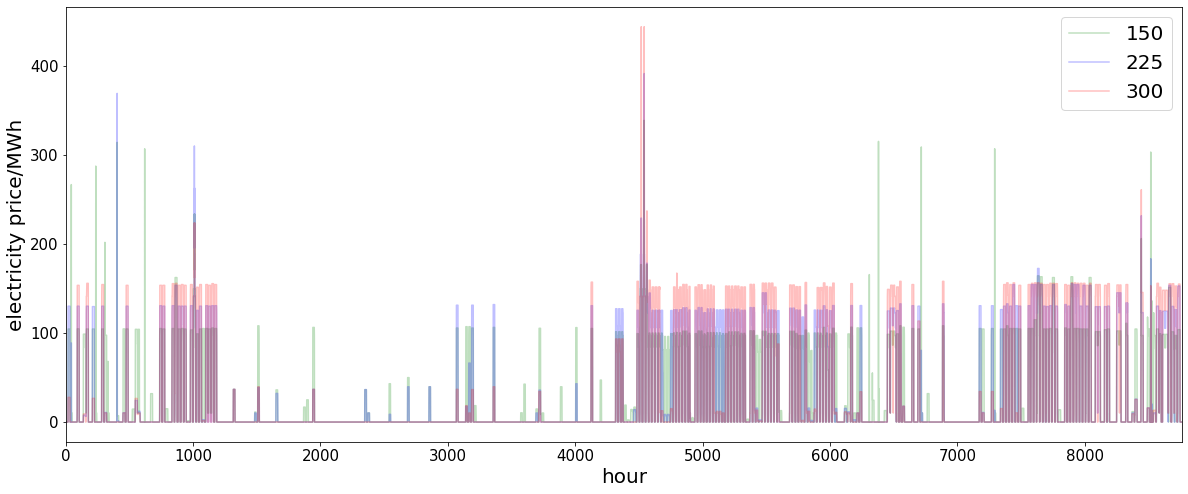

In [41]:
SCENARIO = 'S4UnfavorableNoNET'
X = range(8760)
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.plot(X, dfs[SCENARIO, 'C150']['value'].values, 'g-', label='150', alpha=0.25)
ax.plot(X, dfs[SCENARIO, 'C225']['value'].values, 'b-', label='225', alpha=0.25)
ax.plot(X, dfs[SCENARIO, 'C300']['value'].values, 'r-', label='300', alpha=0.25)

ax.set_xlim([0, 8760])

plt.setp(ax.get_xticklabels(), fontsize=FONTSIZE_SMALL)
plt.setp(ax.get_yticklabels(), fontsize=FONTSIZE_SMALL)
ax.set_ylabel("electricity price/MWh", fontsize=FONTSIZE_BIG)
ax.set_xlabel("hour", fontsize=FONTSIZE_BIG)
params = {'legend.fontsize': FONTSIZE_BIG, 'legend.handlelength': 2}
plt.rcParams.update(params)
plt.legend()

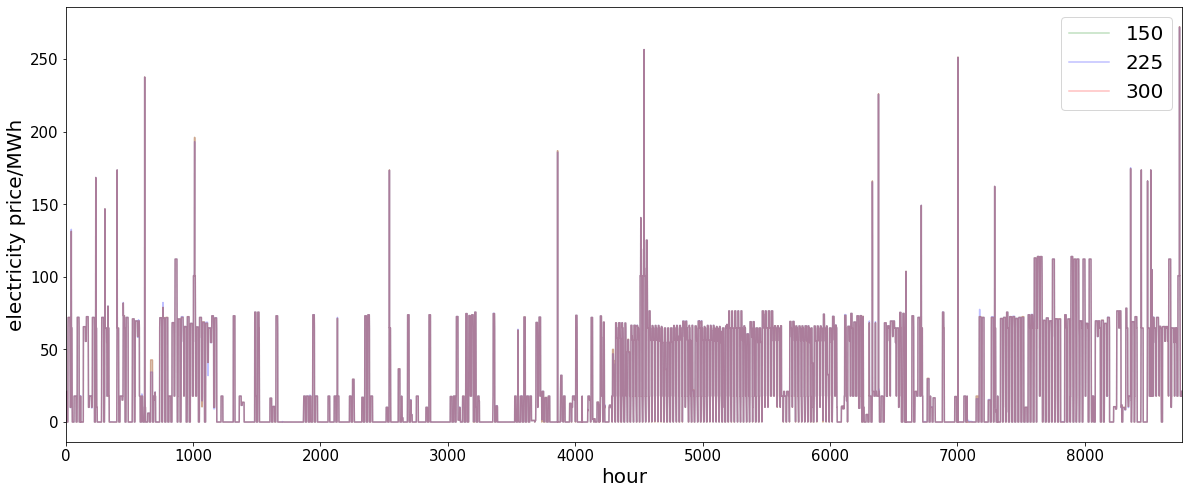

In [44]:
SCENARIO = 'S5Unfavorable'
X = range(8760)
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.plot(X, dfs[SCENARIO, 'C150']['value'].values, 'g-', label='150', alpha=0.25)
ax.plot(X, dfs[SCENARIO, 'C225']['value'].values, 'b-', label='225', alpha=0.25)
ax.plot(X, dfs[SCENARIO, 'C300']['value'].values, 'r-', label='300', alpha=0.25)

ax.set_xlim([0, 8760])

plt.setp(ax.get_xticklabels(), fontsize=FONTSIZE_SMALL)
plt.setp(ax.get_yticklabels(), fontsize=FONTSIZE_SMALL)
ax.set_ylabel("electricity price/MWh", fontsize=FONTSIZE_BIG)
ax.set_xlabel("hour", fontsize=FONTSIZE_BIG)
params = {'legend.fontsize': FONTSIZE_BIG, 'legend.handlelength': 2}
plt.rcParams.update(params)
plt.legend()